In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NBA_metrics_13_to_20.csv')

In [3]:
qualify_df = df[df.MP > 100]

In [4]:
metrics = ['PER','WS.48','RAPM','LA_RAPM','BPM','RPM','PIPM','raptor']


metric_matrix = np.zeros((len(metrics),len(metrics)))
year_range = range(13,19)
for year in year_range:
    df_year_y_1 = qualify_df[qualify_df.Season == '20'+str(year)+'-'+str(year+1)]
    df_year_y_2 = qualify_df[qualify_df.Season == '20'+str(year+1)+'-'+str(year+2)]
    merge_df = pd.merge(df_year_y_1,df_year_y_2,on='PLAYER_ID').dropna()
    
    for i,metric_y_1 in enumerate(metrics):
        for j,metric_y_2 in enumerate(metrics):
            slope, intercept, r_value, p_value, std_err = stats.linregress(merge_df[metric_y_1 + '_x'], merge_df[metric_y_2 + '_y'])
            metric_matrix[i][j] +=  r_value**2 / len(year_range)        


In [5]:
len(range(13,19))

6

Text(0.5, 1, 'Average R squared of combined metrics')

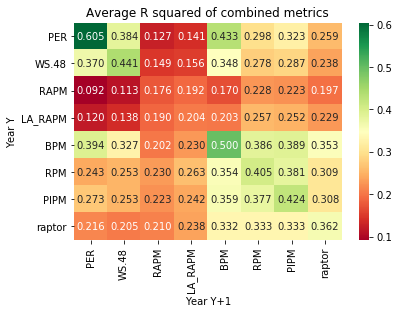

In [16]:
sns.heatmap(metric_matrix, annot=True, fmt="1.3f", xticklabels=metrics, yticklabels=metrics,cmap='RdYlGn')
plt.xlabel('Year Y+1')
plt.ylabel('Year Y')
plt.title('Average R squared of combined metrics')

In [7]:
qualify_df['OWS.48'] = qualify_df['OWS']/qualify_df['MP']*48
qualify_df['DWS.48'] = qualify_df['DWS']/qualify_df['MP']*48

C:\Users\kayiu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kayiu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
metrics_o = ['OWS.48','RAPM__Off','LA_RAPM__Off','OBPM','ORPM','OPIPM','raptor_o']


metric_matrix_o = np.zeros((len(metrics_o),len(metrics_o)))
year_range = range(13,19)
for year in year_range:
    df_year_y_1 = qualify_df[qualify_df.Season == '20'+str(year)+'-'+str(year+1)]
    df_year_y_2 = qualify_df[qualify_df.Season == '20'+str(year+1)+'-'+str(year+2)]
    merge_df = pd.merge(df_year_y_1,df_year_y_2,on='PLAYER_ID').dropna()
    
    for i,metric_y_1 in enumerate(metrics_o):
        for j,metric_y_2 in enumerate(metrics_o):
            slope, intercept, r_value, p_value, std_err = stats.linregress(merge_df[metric_y_1 + '_x'], merge_df[metric_y_2 + '_y'])
            metric_matrix_o[i][j] +=  r_value**2 / len(year_range)   

Text(0.5, 1, 'Correlation coefficient of offensive metrics')

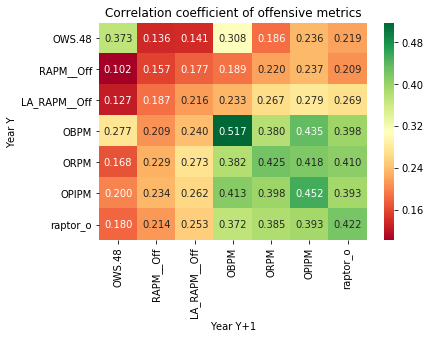

In [14]:
sns.heatmap(metric_matrix_o, annot=True, fmt="1.3f", xticklabels=metrics_o, yticklabels=metrics_o,cmap='RdYlGn')
plt.xlabel('Year Y+1')
plt.ylabel('Year Y')
plt.title('Average R squared of offensive metrics')

In [10]:
metrics_d = ['DWS.48','RAPM__Def','LA_RAPM__Def','DBPM','DRPM','DPIPM','raptor_d']


metric_matrix_d = np.zeros((len(metrics_d),len(metrics_d)))
year_range = range(13,19)
for year in year_range:
    df_year_y_1 = qualify_df[qualify_df.Season == '20'+str(year)+'-'+str(year+1)]
    df_year_y_2 = qualify_df[qualify_df.Season == '20'+str(year+1)+'-'+str(year+2)]
    merge_df = pd.merge(df_year_y_1,df_year_y_2,on='PLAYER_ID').dropna()
    
    for i,metric_y_1 in enumerate(metrics_d):
        for j,metric_y_2 in enumerate(metrics_d):
            slope, intercept, r_value, p_value, std_err = stats.linregress(merge_df[metric_y_1 + '_x'], merge_df[metric_y_2 + '_y'])
            metric_matrix_d[i][j] +=  r_value**2 / len(year_range)   

Text(0.5, 1, 'Correlation coefficient of defensive metrics')

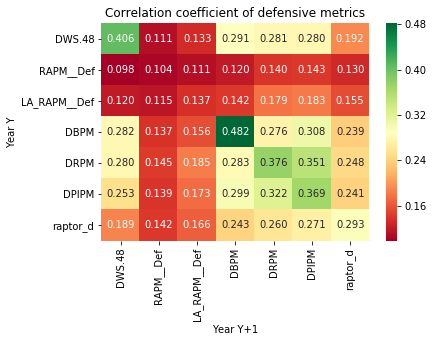

In [15]:
sns.heatmap(metric_matrix_d, annot=True, fmt="1.3f", xticklabels=metrics_d, yticklabels=metrics_d,cmap='RdYlGn')
plt.xlabel('Year Y+1')
plt.ylabel('Year Y')
plt.title('Average R squared of defensive metrics')